In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [22]:
data = pd.read_csv('data.csv')
real_distance = data.iloc[:, 1].values
measured_distance = data.iloc[:, 2].values
power = data.iloc[:, 3].values
delta= data.iloc[:, 4].values
#data_X = np.vstack((measured_distance,delta)).T
data_X = measured_distance
data_y = delta
print(data_X)

[  1.16   1.29   1.25 ... 100.37 100.38 100.41]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [24]:
batch_sizes=[4,8]
middle_layer_sizes=[x for x in range(4,40,4)]

In [25]:
print(X_test)
print(y_test)

[ 10.24  50.42  55.79   4.23   3.07  55.78  55.76   4.2   15.41 111.04
  90.43   3.17   7.61  30.99 141.41  45.9   60.56 100.36  15.41 120.47
  95.99  45.9  136.55 141.38  40.78 144.17   3.17 144.12  21.17  85.48
  65.29  70.86 120.46 141.39   7.62 111.03  90.37 136.6  141.34 125.76
  35.81   4.27   2.24  96.01  15.41 144.15   3.17  10.23  80.3   85.54
  45.92  65.27 110.99  50.42   5.21  70.85   3.24 106.02   1.25 106.02
  85.54  26.12   1.18  75.42  75.42  35.83  26.09 130.12  35.84  70.87
 120.45 136.6   26.13 125.71  65.3    4.21  31.    10.25 106.02   5.18
  75.39   2.29 111.   144.08 110.99  90.4   75.38  80.34 144.05  45.91
  45.89  75.37 100.39  26.1    7.57  15.44 130.06   2.32 120.42 111.01
  95.99  40.79 136.6   45.89   5.19 144.14  70.87  90.39  95.99  10.22
   7.63  75.42  60.57 100.32  15.43 111.02  65.3    4.29  15.41   5.15
  12.85  85.54  30.98  80.28 141.38  35.77 125.71  75.42  31.    12.86
  65.26  55.79  80.29  26.1  100.36   4.28 106.03  12.86   4.3    1.16
 111.0

batch_size: 4, middle_layer_size: 4, mse: [0.004737296607345343, 0.004737296607345343]
batch_size: 4, middle_layer_size: 8, mse: [0.016767507418990135, 0.016767507418990135]
batch_size: 4, middle_layer_size: 12, mse: [0.004426772706210613, 0.004426772706210613]
batch_size: 4, middle_layer_size: 16, mse: [0.04722853749990463, 0.04722853749990463]
batch_size: 4, middle_layer_size: 20, mse: [3.3211140632629395, 3.3211140632629395]
batch_size: 4, middle_layer_size: 24, mse: [0.005002828314900398, 0.005002828314900398]
batch_size: 4, middle_layer_size: 28, mse: [0.004235704429447651, 0.004235704429447651]
batch_size: 4, middle_layer_size: 32, mse: [0.011424969881772995, 0.011424969881772995]
batch_size: 4, middle_layer_size: 36, mse: [0.004309684503823519, 0.004309684503823519]
batch_size: 8, middle_layer_size: 4, mse: [0.004238542169332504, 0.004238542169332504]
batch_size: 8, middle_layer_size: 8, mse: [0.007582420948892832, 0.007582420948892832]
batch_size: 8, middle_layer_size: 12, mse:

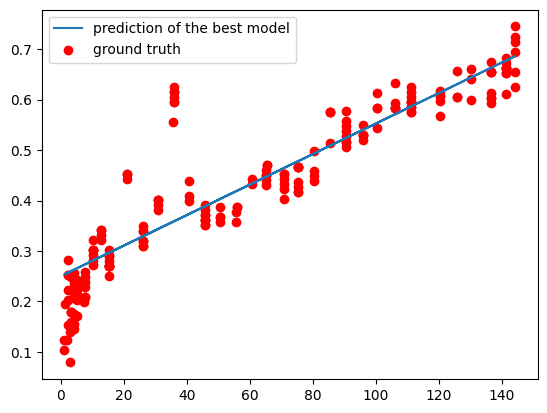

Best parameters are (4, 28, [0.004235704429447651, 0.004235704429447651])


In [26]:
prediction=0
parameters=[]
lowest_mse=1000000
best_parameters=None
for batch_size in batch_sizes:
    for size in middle_layer_sizes:
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='linear', input_shape=(1,)),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(size, activation='linear'),
        
        tf.keras.layers.Dense(1)
        ])
        model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics='mse')
        model.fit(X_train, y_train, epochs=30, batch_size=batch_size,verbose=0)
        mse = model.evaluate(X_test, y_test, verbose=0)
        if mse[0] < lowest_mse:
            lowest_mse = mse[0]
            best_parameters = (batch_size,size,mse)
            best_model=model
        parameters.append((batch_size,size,mse))
        print(f"batch_size: {batch_size}, middle_layer_size: {size}, mse: {mse}")
        #lt.scatter(X_test, model.predict(X_test,verbose=0), label=f'{prediction}')
        prediction+=1
plt.plot(X_test,best_model.predict(X_test),label="prediction of the best model")
plt.scatter(x=X_test,y= y_test, c='r', label='ground truth')
plt.legend()
plt.show()
print(f"Best parameters are {best_parameters}")

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='linear', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='linear'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

model.fit(X_train, y_train, epochs=30, batch_size=1)


Epoch 1/30
804/804 [==============================] - 5s 4ms/step - loss: 2.8227
Epoch 2/30
804/804 [==============================] - 4s 4ms/step - loss: 0.0362
Epoch 3/30
804/804 [==============================] - 4s 5ms/step - loss: 0.9732
Epoch 4/30
804/804 [==============================] - 3s 4ms/step - loss: 0.0163
Epoch 5/30
804/804 [==============================] - 2s 3ms/step - loss: 3.4949
Epoch 6/30
804/804 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 7/30
804/804 [==============================] - 2s 2ms/step - loss: 0.0089
Epoch 8/30
804/804 [==============================] - 2s 3ms/step - loss: 0.0784
Epoch 9/30
804/804 [==============================] - 3s 3ms/step - loss: 1.1497
Epoch 10/30
804/804 [==============================] - 2s 2ms/step - loss: 0.0234
Epoch 11/30
804/804 [==============================] - 2s 2ms/step - loss: 0.0159
Epoch 12/30
804/804 [==============================] - 2s 2ms/step - loss: 0.1461
Epoch 13/30
804/804 [====

In [28]:
mse = model.evaluate(X_test, y_test)
print(f'Test {mse=}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0090
Test mse=0.008984778076410294
